Although Seaborn adds visual elements, that is not its only strength. It also provides simple ways of creating more complex statistical graphs.

The following example compares plotting two heatmaps: the first using Matplotlib and the second using Seaborn.

## What is a heatmap plot?

A heatmap plot is a graphical representation of data. Where the individual values are represented in a colour matrix, it makes it easier to find the highest or lowest values. This plot is useful for getting a quick overview of numerical data, rather than a specific data point.

This example compares the types of grape varieties with the different regions showing the tonnes of each variety picked in each region.

In [1]:
# create the DataFrame

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

grapes = ["Shiraz", "Cabernet Sauvignon", "Merlot", "Pinot noir",
          "Grenache", "Mourvedre", "Other Red"]

region = ["Adelaide Hills", "Adelaide Plains", "Barossa Valley",
          "Clare Valley", "Coonawarra", "Currency Creek", "Eden Valley"]

#We generate a random two-dimensional matrix 7 by 7 matrix
#We using a normal distribution with median= 7 and standard deviation = 5

seed_value = 10
np.random.seed(seed_value)
harvest = np.round(np.random.normal(8,4,[7,7]),decimals = 2)
df_grapes = pd.DataFrame(harvest, index = grapes, columns = region)
df_grapes

,Adelaide Hills,Adelaide Plains,Barossa Valley,Clare Valley,Coonawarra,Currency Creek,Eden Valley
Shiraz,13.33,10.86,1.82,7.97,10.49,5.12,9.06
Cabernet Sauvignon,8.43,8.02,7.30,9.73,12.81,4.14,12.11
Merlot,8.91,9.78,3.45,8.54,13.94,3.68,0.09
Pinot noir,1.03,9.06,17.54,12.49,14.69,8.40,13.59
Grenache,6.92,10.45,6.93,5.80,8.53,6.10,13.23
Mourvedre,8.78,9.60,6.65,13.03,5.07,10.64,6.60
Other Red,4.24,6.04,4.78,7.15,6.64,9.25,10.26


Pyplot has a function **pcolor()** , which creates a basic heatmap.

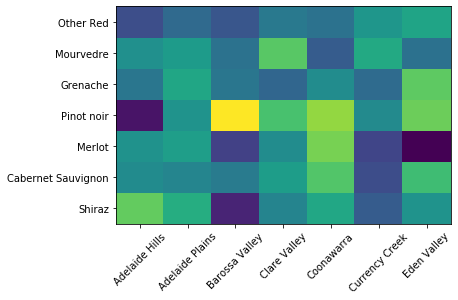

In [2]:
#set the data for the plot as a heatmap
plt.pcolor(df_grapes)

#set the y labels to be the grape varieties
plt.yticks(np.arange(0.5, len(df_grapes.index), 1), df_grapes.index)

#set the x labels to be the regions
plt.xticks(np.arange(0.5, len(df_grapes.columns), 1), df_grapes.columns, rotation = 45)

#display the plot
plt.show()

In this plot, you can see the relationship between the grape varieties and the different regions. But there are several aspects that make it harder to interpret this graph. First, there is no clear indication of what the different colours mean. Does the light colour mean there are lots of pinot noir grapes in the Barossa or does it mean there aren't many pinot noir grapes in the Barossa? Also, how much colour differentiation is there?

Let's start by actually showing the data frame values in this graph.

If you want the numeric values per column, you need to perform a for loop to get them. In the following example, you can see how we create an annotated heatmap.

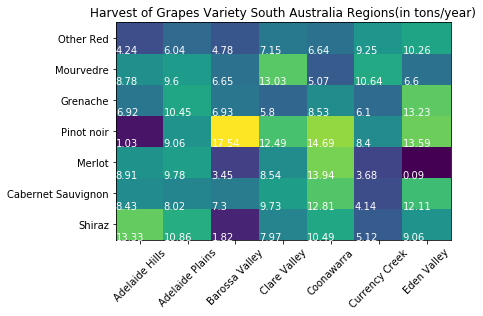

In [3]:
# Plotting a heatmap with numerical values in Matplotlib 

# set the data for the plot as a heat map
plt.pcolor(df_grapes)

# set the y lables to the grape varieties

#set the y labels to be the grape varieties
plt.yticks(np.arange(0.5, len(df_grapes.index), 1), df_grapes.index)

#set the x labels to be the regions
plt.xticks(np.arange(0.5, len(df_grapes.columns), 1), df_grapes.columns, rotation =45)

# get the axes so you can add text to them
ax = plt.gca()

# for loop over DataFrame to create text annotations

for i in range(len(df_grapes.index)): # index : grapes variety
    for j in range(len(df_grapes.columns)): #columns : regions
        text = ax.text(j,i, df_grapes.iloc[i][j], color = 'w')
        
        
ax.set_title("Harvest of Grapes Variety South Australia Regions(in tons/year)")

plt.show()

## Heatmap with Seaborn

Now, let’s compare the same plot (heatmap) using Seaborn (with far fewer code lines). The Seaborn library heatmap is implemented as a method.

**sns.heatmap(<<Data>>, annot =True, fmt ='.2f', linewidths =0.5, cmap="BuPu_r)**


annot is set up so the numeric values appear in the colour matrix.\
fmt is to give the format to the numeric values, in this case just two precision digits after the dot.\
linewidths parameter is to set up the width of the lines in the colour Matrix.\
cmap parameter is to change the colours of the matrix. More details on controlling colour in Seaborn heatmaps can be viewed on the Python Graph Gallery.https://python-graph-gallery.com/92-control-color-in-seaborn-heatmaps/

This method includes common characteristics of heatmaps, such as the axes labels that we had to manually add for the Matplotlib heatmap. Another important detail here is the colour bar that is automatically set up by Seaborn's heatmap() method!

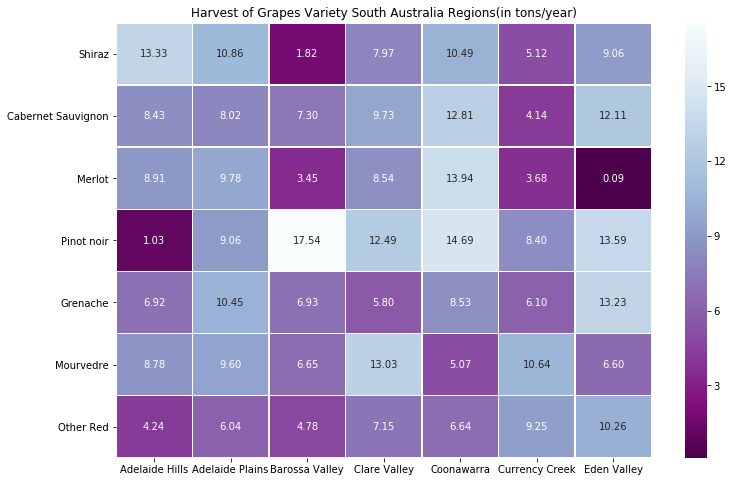

In [12]:
# libraries

import numpy as np # manipulation of arrays
import pandas as pd # manipulation of data as DataFrame or Series

# Libraries for matplotlib

import matplotlib.pyplot as plt
import seaborn as sns # seaborn library

%matplotlib inline


#Plotting with seaborn
plt.figure(figsize=(12,8))

#get the axes so we can set the title
ax = plt.gca()
ax.set_title("Harvest of Grapes Variety South Australia Regions(in tons/year)")

#plot the heatmap!
sns.heatmap(df_grapes, annot=True, fmt='.2f', linewidths=.5, cmap="BuPu_r")

# fix for mpl bug that cuts off top/bottom of seaborn viz
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show() # ta-da!

Heatmap plots show the values of the data with colour. In this plot, the dark colours indicate the lowest values and the light colours represent the biggest values, which can be easily seen from the sidebar and the data values. For example, if you look at the region Barossa Valley with the intersection of the grape variety, pinot noir has the biggest value of 17.54 tonnes. On the other hand, the Eden Valley region had a terrible year picking the merlot variety. Also, notice how Seaborn has chosen the colour for the numbers to suit the background colour.